In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

In [2]:
class GammaDistribution:
    def __init__(self, alpha, beta):
        self.alpha = alpha
        self.beta = beta

    def pdf(self, x):
        coef = (self.beta ** self.alpha) / np.math.gamma(self.alpha)
        return coef * (x ** (self.alpha - 1)) * np.exp(-self.beta * x)

    def cdf(self, x):
        return np.array([self._cdf_single(val) for val in x])

    def _cdf_single(self, x):
        return sum(self.pdf(t) for t in np.linspace(0, x, 1000)) * (x / 1000)

def plot_pdf(x_values, pdf1, pdf2, label1, label2, title):
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, pdf1, label=label1, color='blue')
    plt.plot(x_values, pdf2, label=label2, color='red')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('PDF')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_cdf(x_values, cdf1, cdf2, label1, label2, title):
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, cdf1, label=label1, color='blue')
    plt.plot(x_values, cdf2, label=label2, color='red')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('CDF')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_comparison(x_values, pdf_scipy, pdf_custom, label1, label2, title):
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, pdf_scipy, label=label1, color='blue', linestyle='--')
    plt.plot(x_values, pdf_custom, label=label2, color='orange')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('PDF')
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
# Parameters for two gamma distributions (shape α and rate β)
alpha1, beta1 = 2, 2
alpha2, beta2 = 5, 1

# Generate x values
x_gamma = np.linspace(0, 20, 1000)

# Calculate PDF and CDF using scipy
pdf_gamma_1_scipy = gamma.pdf(x_gamma, alpha1, scale=1/beta1)
pdf_gamma_2_scipy = gamma.pdf(x_gamma, alpha2, scale=1/beta2)
cdf_gamma_1_scipy = gamma.cdf(x_gamma, alpha1, scale=1/beta1)
cdf_gamma_2_scipy = gamma.cdf(x_gamma, alpha2, scale=1/beta2)

# Create instances of GammaDistribution
gamma_dist_1 = GammaDistribution(alpha1, beta1)
gamma_dist_2 = GammaDistribution(alpha2, beta2)

# Calculate PDF and CDF using custom class
pdf_gamma_1_custom = np.array([gamma_dist_1.pdf(x) for x in x_gamma])
pdf_gamma_2_custom = np.array([gamma_dist_2.pdf(x) for x in x_gamma])

cdf_gamma_1_custom = gamma_dist_1.cdf(x_gamma)
cdf_gamma_2_custom = gamma_dist_2.cdf(x_gamma)

/tmp/ipykernel_1382587/686833929.py:7: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  coef = (self.beta ** self.alpha) / np.math.gamma(self.alpha)


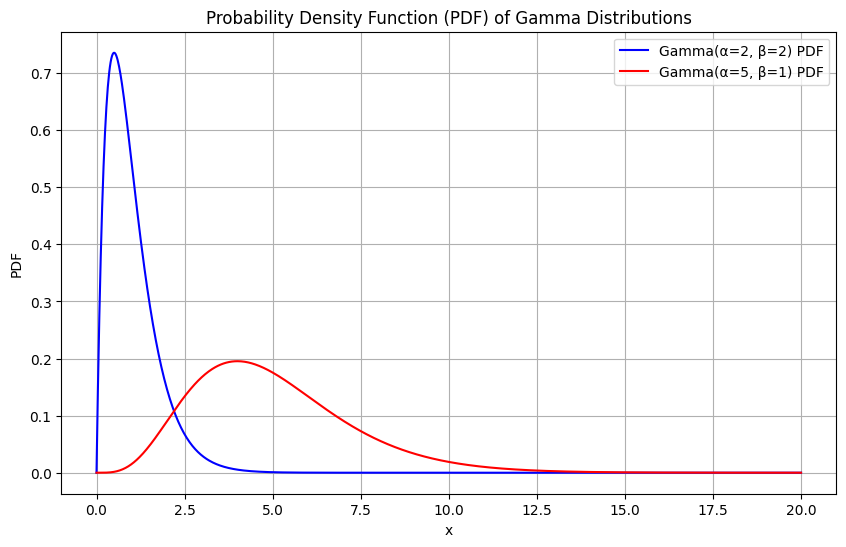

In [4]:
# Plot 1: PDF of Gamma Distributions (Original)
plot_pdf(x_gamma, pdf_gamma_1_scipy, pdf_gamma_2_scipy,
         label1=f'Gamma(α={alpha1}, β={beta1}) PDF', 
         label2=f'Gamma(α={alpha2}, β={beta2}) PDF',
         title='Probability Density Function (PDF) of Gamma Distributions')

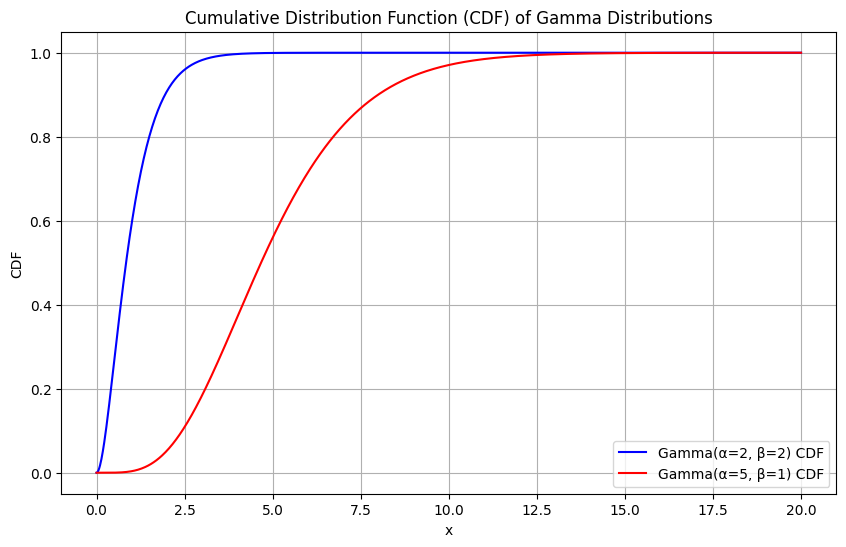

In [5]:
# Plot 2: CDF of Gamma Distributions (Original)
plot_cdf(x_gamma, cdf_gamma_1_scipy, cdf_gamma_2_scipy, 
         label1=f'Gamma(α={alpha1}, β={beta1}) CDF', 
         label2=f'Gamma(α={alpha2}, β={beta2}) CDF', 
         title='Cumulative Distribution Function (CDF) of Gamma Distributions')

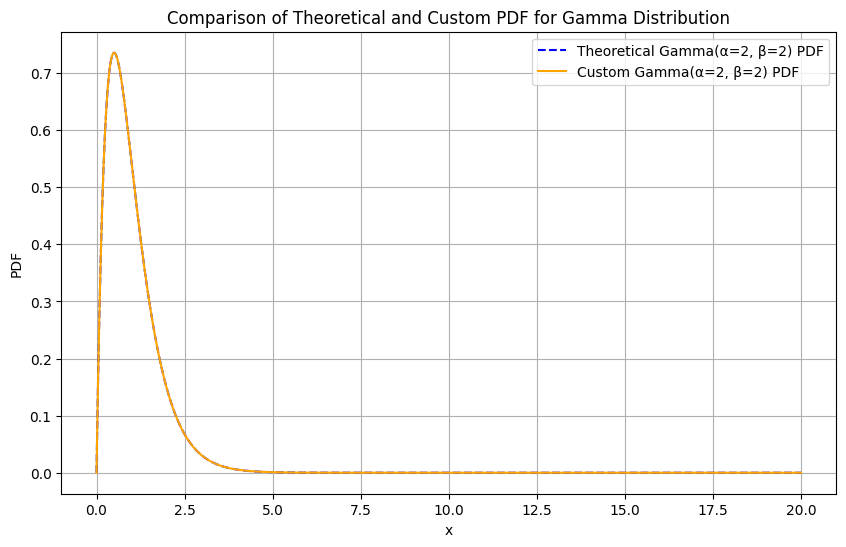

In [6]:
# Plot 3: Comparison of Theoretical and Custom PDFs
plot_comparison(x_gamma, pdf_gamma_1_scipy, pdf_gamma_1_custom, 
                label1=f'Theoretical Gamma(α={alpha1}, β={beta1}) PDF', 
                label2=f'Custom Gamma(α={alpha1}, β={beta1}) PDF', 
                title='Comparison of Theoretical and Custom PDF for Gamma Distribution')